In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\HP\Desktop\weatherAUS.csv")

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


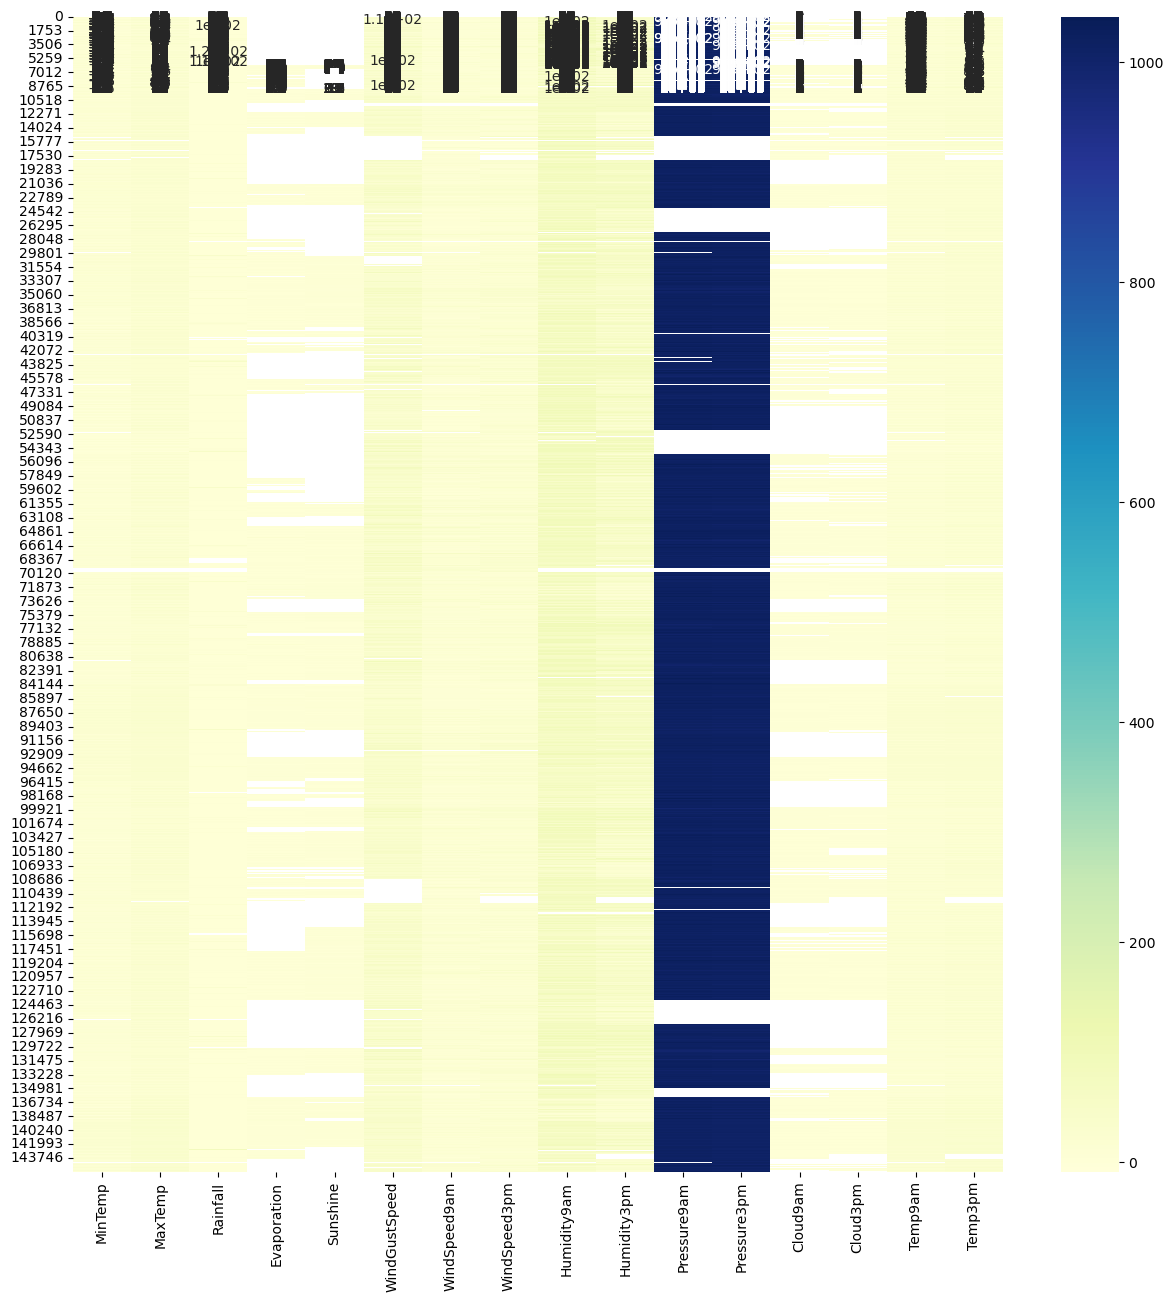

In [31]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15,15))
# Plot the heatmap
sns.heatmap(numeric_df, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#Data visualisations
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='RainTomorrow')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MaxTemp', y='RainTomorrow', data=df)
plt.title('Scatter Plot of temperature vs. Rain Tomorrow ')
plt.xlabel('MaxTemp')
plt.ylabel('RainTomorrow')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WindGustSpeed', y='RainTomorrow', data=df)
plt.title('Scatter Plot of WindGustSpeed vs. Rain Tomorrow ')
plt.xlabel('WindGustSpeed')
plt.ylabel('RainTomorrow')
plt.show()

In [ ]:
df.columns

In [ ]:
numeric_df.corr()

In [ ]:
df.info()

In [ ]:
df.describe()

In [7]:
x=df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y=df.iloc[:,-1].values

In [8]:
x

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 'No'],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 'No'],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 12.5, 26.1, 'No'],
       ['Uluru', 7.8, 27.0, ..., 15.1, 26.0, 'No'],
       ['Uluru', 14.9, nan, ..., 15.0, 20.9, 'No']], dtype=object)

In [ ]:
plt.hist(Y, bins=30, edgecolor='black')
plt.title('Precipitation prediction')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

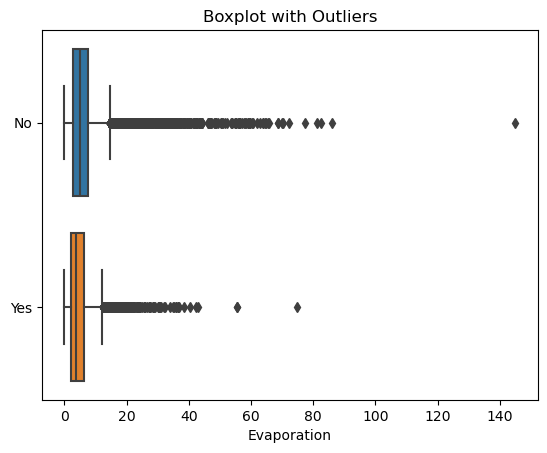

In [25]:
sns.boxplot(x='Evaporation', y=Y, data=df)
plt.title('Boxplot with Outliers')
plt.show()

In [9]:
Y=Y.reshape(-1,1)

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [11]:
x=imputer.fit_transform(x)
Y=imputer.fit_transform(Y)
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0]=le1.fit_transform(x[:,0])
le2=LabelEncoder()
x[:,4]=le2.fit_transform(x[:,4])
le3=LabelEncoder()
x[:,6]=le3.fit_transform(x[:,6])
le4=LabelEncoder()
x[:,7]=le4.fit_transform(x[:,7])
le5=LabelEncoder()
x[:,-1]=le5.fit_transform(x[:,-1])
le6=LabelEncoder()
Y=le6.fit_transform(Y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=0)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
accuracy

In [ ]:
y_pred

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Perform hierarchical/agglomerative clustering
x=x[:1000]
Z = linkage(x, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [15]:
from xgboost import XGBClassifier
xg = XGBClassifier()
# Fit the model
xg.fit(X_train, Y_train)

# Make predictions
predictions =xg.predict(X_test)

In [16]:
accuracy_score(Y_test,predictions)

0.8579334524955314

In [17]:
Y_test=Y_test.reshape(-1,1)
cols=df['Location'].values.reshape(-1,1)
predictions=predictions.reshape(-1,1)

In [18]:
cols_subset = cols[:29092]

In [19]:
data=np.concatenate((cols_subset,Y_test,predictions),axis=1)
df1=pd.DataFrame(data,columns=['Location','Rain on Tomorrow','Prediction'])

In [20]:
df1

,Location,Rain on Tomorrow,Prediction
0,Albury,1,0
1,Albury,1,1
2,Albury,0,0
3,Albury,0,0
4,Albury,0,0
...,...,...,...
29087,Richmond,0,0
29088,Richmond,0,0
29089,Richmond,1,1
29090,Richmond,0,0


In [21]:
df1.to_csv('prediction.csv', index=False) #saving data to file

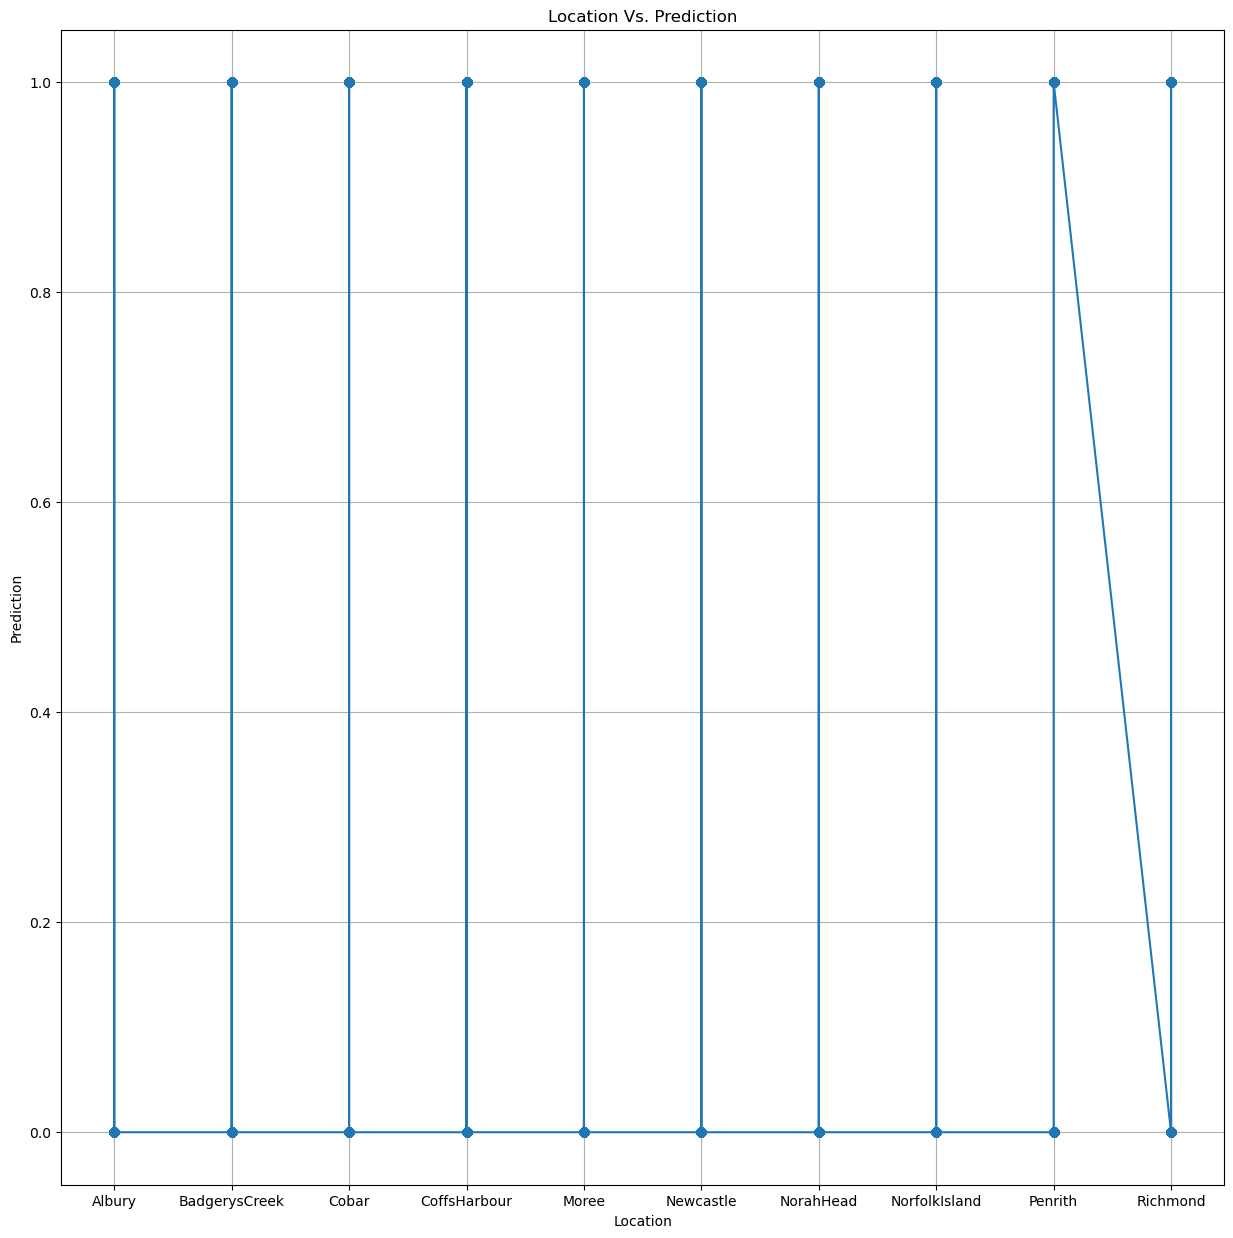

In [30]:
plt.figure(figsize=(15,15))
plt.plot(df1['Location'],df1['Prediction'],marker='o')
plt.title('Location Vs. Prediction')
plt.xlabel('Location')
plt.ylabel('Prediction')
plt.grid(True)  # Adds a grid for better readability
plt.show()

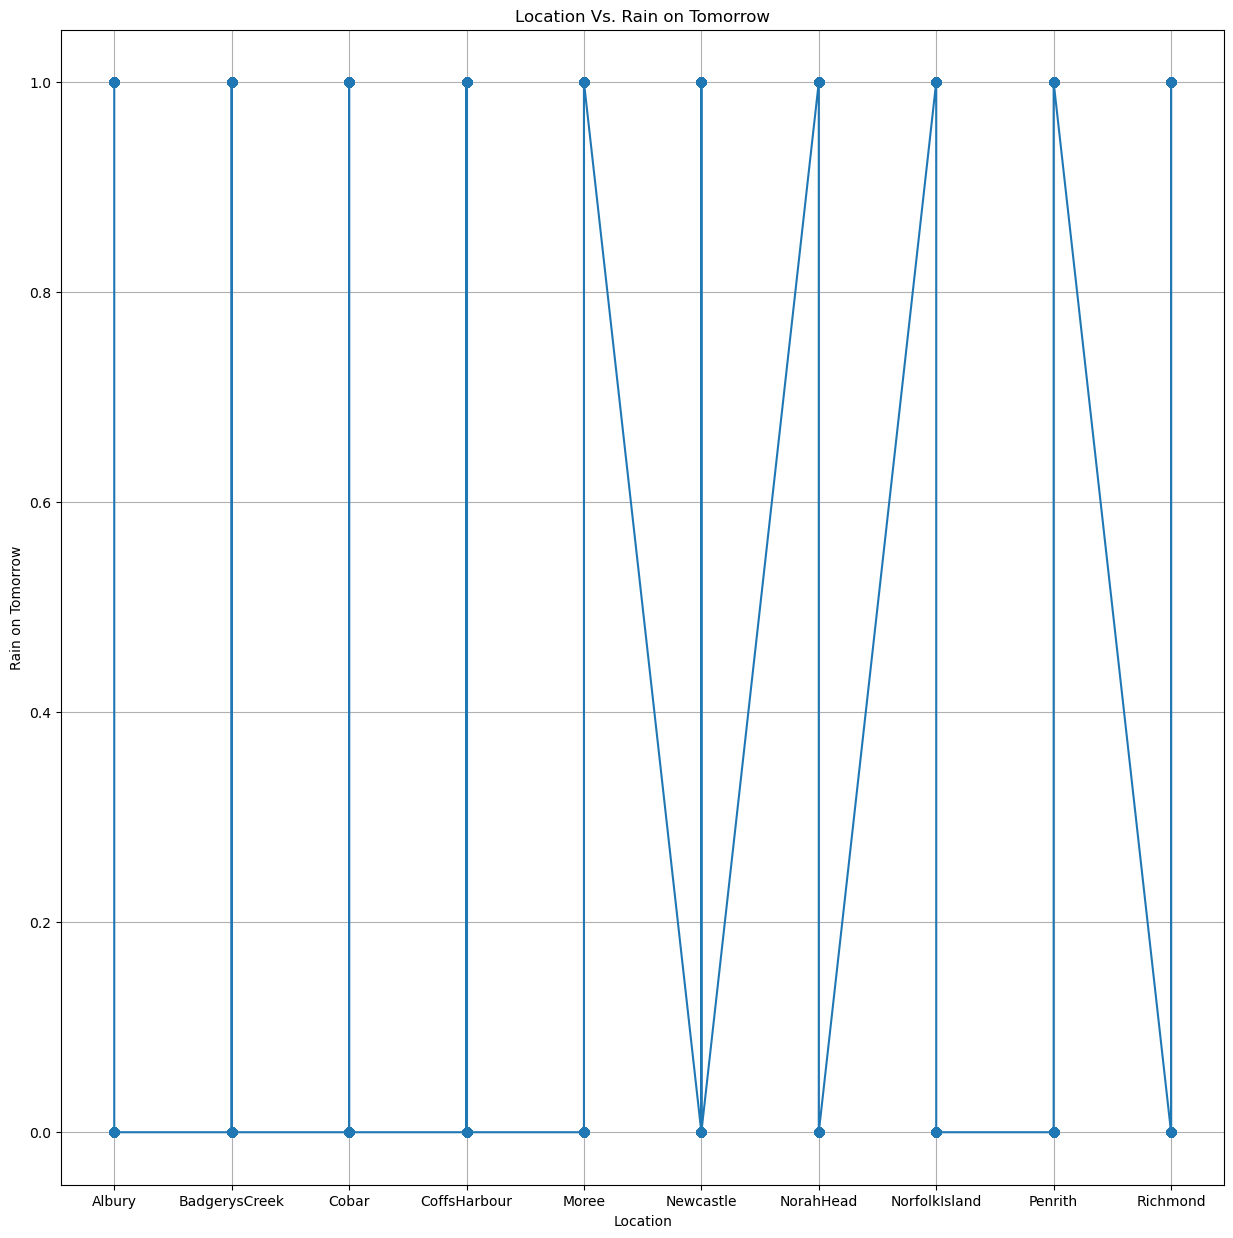

In [29]:
plt.figure(figsize=(15,15))
plt.plot(df1['Location'],df1['Rain on Tomorrow'],marker='o')

plt.title('Location Vs. Rain on Tomorrow')
plt.xlabel('Location')
plt.ylabel('Rain on Tomorrow')
plt.grid(True)  # Adds a grid for better readability
plt.show()

In [52]:
import pandas as pd

# Load the data
df2 = pd.read_csv(r"C:\Users\HP\c tutorials\AI AND ML\prediction.csv")

while True:
    x = input("Enter location (or type 'exit' to quit): ")
    
    if x.lower() == "exit":
        print("Prediction stopped")
        break
    
    # Filter the DataFrame for the given location
    location_data = df2[df2['Location'] == x]
    
    if not location_data.empty:
        # Get the most frequent prediction for the location
        most_frequent_prediction = location_data['Prediction'].mode()[0]
        
        if most_frequent_prediction == 0:
            print("No rain to occur")
        elif most_frequent_prediction == 1:
            print("Rain may occur")
    else:
        print("Invalid location or no data available for the given location")


Enter location (or type 'exit' to quit):  Albury


No rain to occur


Enter location (or type 'exit' to quit):  exit


Prediction stopped
